In [1]:
import pymongo

In [2]:
from pymongo import MongoClient

In [3]:
connection = MongoClient('localhost', 27017)

In [4]:
db = connection.smart_hospital

In [5]:
data = db.covid

In [6]:
dblist = data.find()

In [7]:
dblist

In [8]:
import pandas as pd
df = pd.DataFrame(list(data.find()))

In [9]:
df.shape

(2148, 7)

In [10]:
df.drop(['_id'],axis =1,inplace = True)

In [11]:
df.head()

,feaver,bodypain,age,runnynose,diffbreath,infectionprob
0,99.219947,0,35,1,0,0
1,98.779933,1,28,0,0,0
2,101.417093,0,1,0,1,1
3,98.185998,0,93,1,-1,0
4,98.352495,1,33,0,-1,0


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='infectionprob', ylabel='count'>

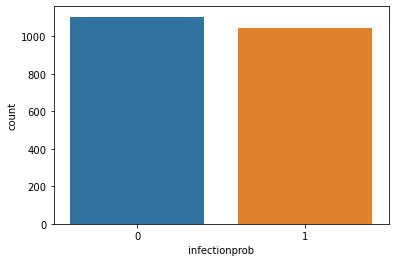

In [13]:
sns.countplot(df.infectionprob)

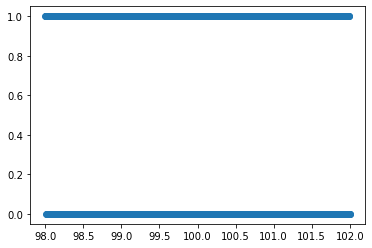

In [14]:
plt.scatter(df.feaver,df.infectionprob)

<AxesSubplot:>

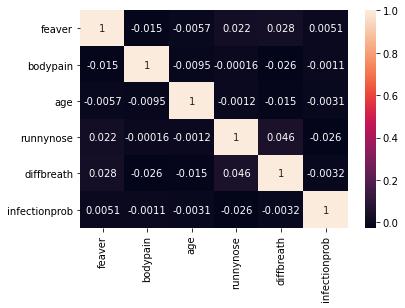

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
df.describe()

,feaver,bodypain,age,runnynose,diffbreath,infectionprob
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,99.979151,0.513966,50.730447,0.502793,-0.028864,0.486034
std,1.163592,0.499921,29.117936,0.500109,0.826948,0.499921
min,98.002958,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,98.973072,0.000000,26.000000,0.000000,-1.000000,0.000000
50%,99.972453,1.000000,50.000000,1.000000,0.000000,0.000000
75%,101.007336,1.000000,76.000000,1.000000,1.000000,1.000000
max,101.999472,1.000000,100.000000,1.000000,1.000000,1.000000


In [17]:
df.diffbreath = abs(df.diffbreath)

In [18]:
df.describe()

,feaver,bodypain,age,runnynose,diffbreath,infectionprob
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,99.979151,0.513966,50.730447,0.502793,0.684358,0.486034
std,1.163592,0.499921,29.117936,0.500109,0.464879,0.499921
min,98.002958,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.973072,0.000000,26.000000,0.000000,0.000000,0.000000
50%,99.972453,1.000000,50.000000,1.000000,1.000000,0.000000
75%,101.007336,1.000000,76.000000,1.000000,1.000000,1.000000
max,101.999472,1.000000,100.000000,1.000000,1.000000,1.000000


In [19]:
X = df.drop('infectionprob',axis=1)
y = df['infectionprob']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=45)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1611, 5), (537, 5), (1611,), (537,))

In [22]:
X_train.head()

,feaver,bodypain,age,runnynose,diffbreath
218,98.505116,0,7,0,1
1169,99.627781,1,6,1,1
2095,98.175996,0,15,0,0
2019,101.143993,1,33,1,1
1612,100.412739,1,87,1,1


## Model

In [23]:
!pip install xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(X,y)

  Using cached xgboost-1.3.3-py3-none-win_amd64.whl (95.2 MB)


C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
print("Training Accuracy :", xgb.score(X_train, y_train))
print("Testing Accuracy :", xgb.score(X_test, y_test))

Training Accuracy : 0.9143389199255121
Testing Accuracy : 0.9162011173184358


In [25]:
predd = [98,0,20,0,0]
feature_value = [np.array(predd)]
feature_name=['feaver','bodypain','age','runnynose','diffbreath']
df1 = pd.DataFrame(feature_value,columns=feature_name)

In [26]:
df1

,feaver,bodypain,age,runnynose,diffbreath
0,98,0,20,0,0


In [27]:
pred_proba = xgb.predict_proba(df1)

In [28]:
pred_proba[0][0]

0.38769758

In [29]:
import pickle
filename = 'xgb_corona.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [30]:
model = open("xgb_corona.pkl","rb")
model = pickle.load(model)

In [31]:
pred_proba = model.predict_proba(df1)

In [32]:
pred_proba[0][0]

0.38769758